# Task 1: User Overview Analysis
This notebook contains the analysis for Task 1 of the TellCo project, focusing on user overview analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src')
from database import get_db_connection
from analysis import *

sns.set_palette("husl")

## 1. Top Handsets Analysis

Top 10 handsets used by customers:


c:\Users\hp\Documents\telleco_week2\notebooks\../src\analysis.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, connection, params=[limit])


,handset_type,count
0,Huawei B528S-23A,19752
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,undefined,8987
4,Apple iPhone 7 (A1778),6326
5,Apple iPhone Se (A1723),5187
6,Apple iPhone 8 (A1905),4993
7,Apple iPhone Xr (A2105),4568
8,Samsung Galaxy S8 (Sm-G950F),4520
9,Apple iPhone X (A1901),3813


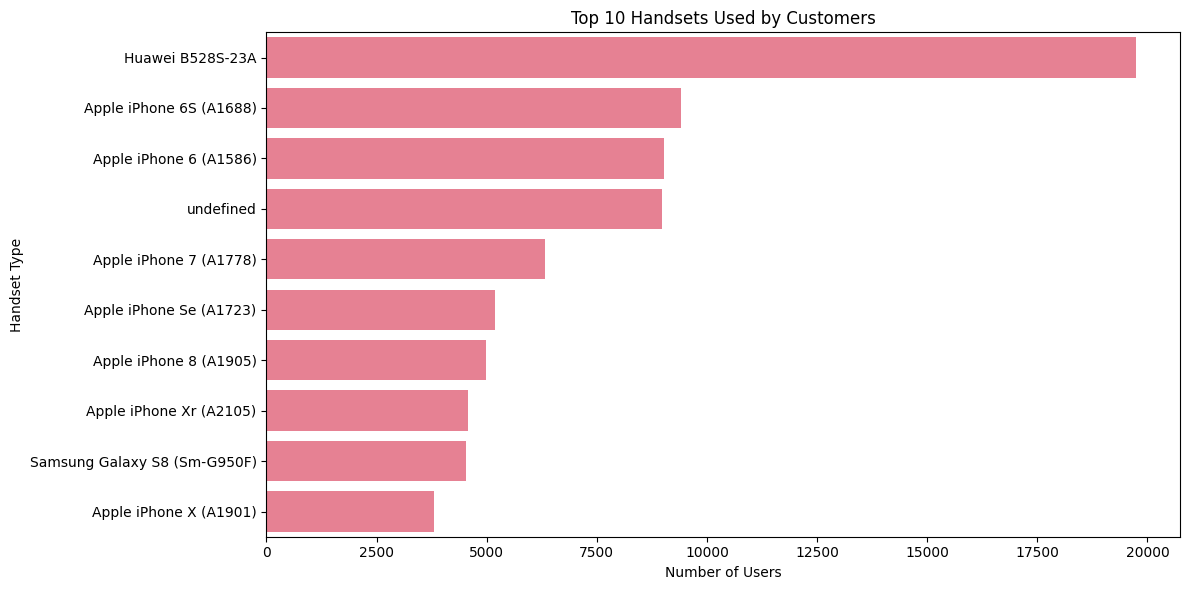

In [2]:
# Get database connection
conn = get_db_connection()

# Get top 10 handsets
top_handsets = get_top_handsets(conn)
print("Top 10 handsets used by customers:")
display(top_handsets)

# Visualize top handsets
plt.figure(figsize=(12, 6))
sns.barplot(data=top_handsets, x='count', y='handset_type')
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Number of Users')
plt.ylabel('Handset Type')
plt.tight_layout()
plt.show()

## 2. Top Manufacturers Analysis

Top 3 handset manufacturers:


c:\Users\hp\Documents\telleco_week2\notebooks\../src\analysis.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, connection, params=[limit])


,handset_manufacturer,count
0,Apple,59565
1,Samsung,40839
2,Huawei,34423


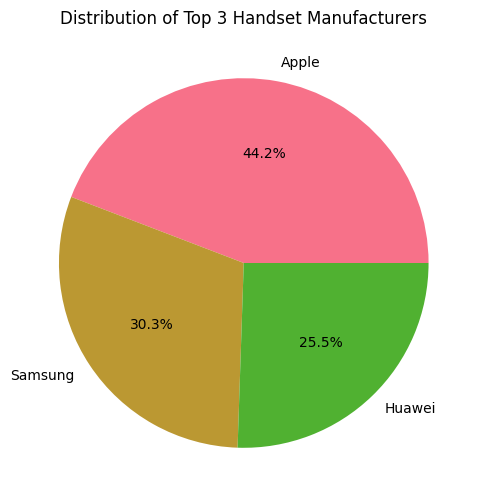

In [3]:
# Get top 3 manufacturers
top_manufacturers = get_top_manufacturers(conn)
print("Top 3 handset manufacturers:")
display(top_manufacturers)

# Visualize top manufacturers
plt.figure(figsize=(10, 6))
plt.pie(top_manufacturers['count'], labels=top_manufacturers['handset_manufacturer'], autopct='%1.1f%%')
plt.title('Distribution of Top 3 Handset Manufacturers')
plt.show()

## 3. Top Handsets per Manufacturer

Top 5 handsets per manufacturer:


c:\Users\hp\Documents\telleco_week2\notebooks\../src\analysis.py:57: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, connection, params=params)


,handset_manufacturer,handset_type,count,rank
0,Apple,Apple iPhone 6S (A1688),9419,1
1,Apple,Apple iPhone 6 (A1586),9023,2
2,Apple,Apple iPhone 7 (A1778),6326,3
3,Apple,Apple iPhone Se (A1723),5187,4
4,Apple,Apple iPhone 8 (A1905),4993,5
5,Huawei,Huawei B528S-23A,19752,1
6,Huawei,Huawei E5180,2079,2
7,Huawei,Huawei P20 Lite Huawei Nova 3E,2021,3
8,Huawei,Huawei P20,1480,4
9,Huawei,Huawei Y6 2018,997,5


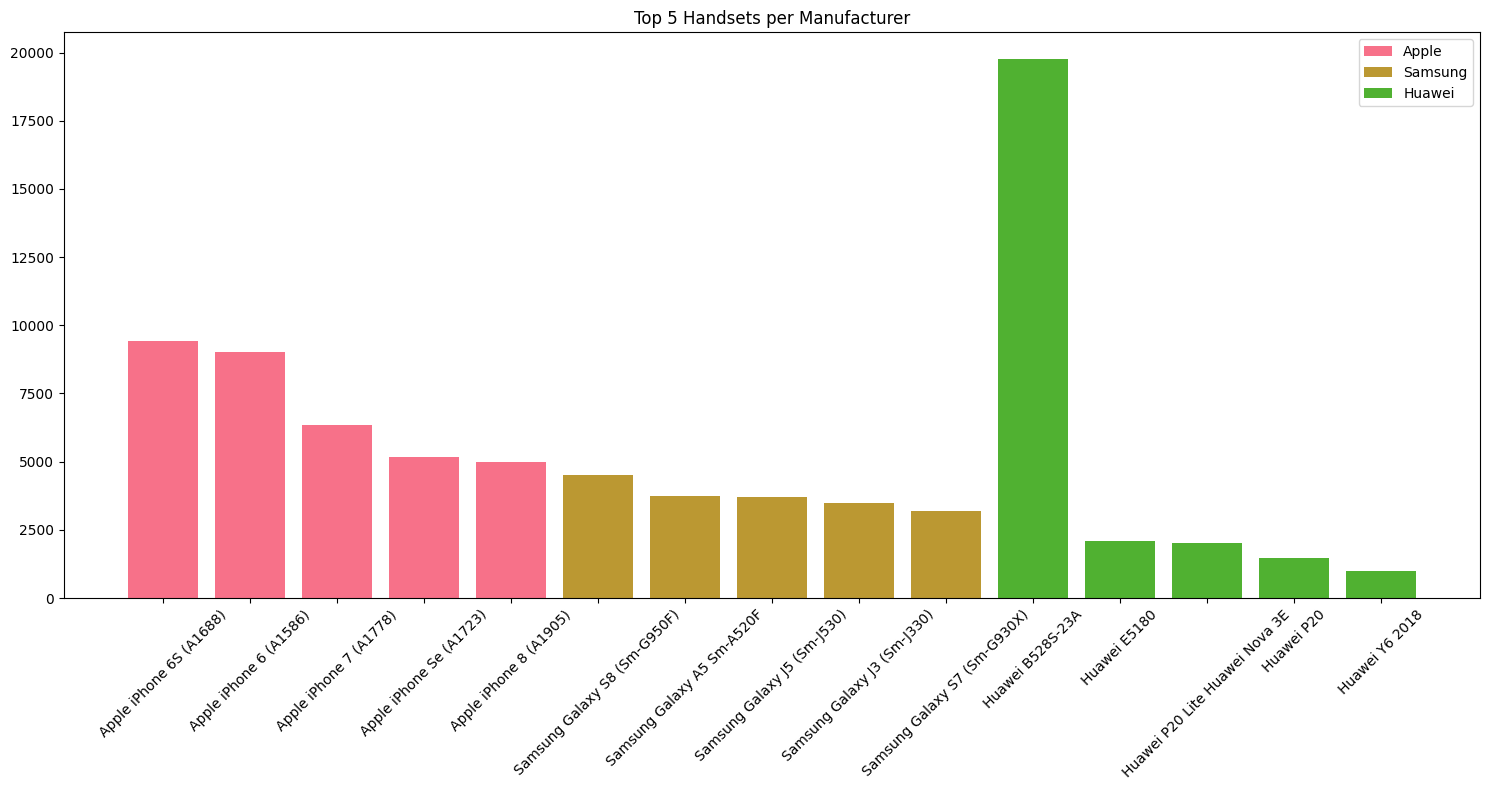

In [4]:
# Get top handsets per manufacturer
manufacturers = top_manufacturers['handset_manufacturer'].tolist()
top_handsets_per_manufacturer = get_top_handsets_per_manufacturer(conn, manufacturers)
print("Top 5 handsets per manufacturer:")
display(top_handsets_per_manufacturer)

# Visualize top handsets per manufacturer
plt.figure(figsize=(15, 8))
for manufacturer in manufacturers:
    manufacturer_data = top_handsets_per_manufacturer[top_handsets_per_manufacturer['handset_manufacturer'] == manufacturer]
    plt.bar(manufacturer_data['handset_type'], manufacturer_data['count'], label=manufacturer)
plt.title('Top 5 Handsets per Manufacturer')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 4. User Behavior Analysis

In [5]:
# Get aggregated user behavior data
user_behavior = aggregate_user_behavior(conn)

# Display basic statistics
print("Basic statistics of user behavior:")
display(user_behavior.describe())

# Check for missing values
print("\nMissing values:")
display(user_behavior.isnull().sum())

# Handle missing values with mean
user_behavior = user_behavior.fillna(user_behavior.mean())

# Segment users by duration
duration_segments = segment_users_by_duration(user_behavior)
print("\nTotal data volume per duration decile:")
display(duration_segments)

c:\Users\hp\Documents\telleco_week2\notebooks\../src\analysis.py:81: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, connection)


Basic statistics of user behavior:


,msisdn,number_of_sessions,total_duration,total_dl_data,total_ul_data,total_data_volume,social_media_data,google_data,email_data,youtube_data,netflix_data,gaming_data,other_data
count,1.068560e+05,106857.000000,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05
mean,4.511474e+10,1.403755,1.468438e+05,6.382035e+08,5.772370e+07,6.959272e+08,2.566415e+06,1.095953e+07,3.171225e+06,3.178589e+07,3.176501e+07,6.040820e+08,6.027236e+08
std,2.889423e+12,3.355032,2.892198e+05,1.558474e+09,1.400375e+08,1.695706e+09,6.325032e+06,2.630542e+07,7.661339e+06,7.735388e+07,7.709618e+07,1.479703e+09,1.449064e+09
min,3.360100e+10,1.000000,7.142000e+03,8.827082e+06,2.866892e+06,3.324901e+07,1.563000e+03,4.033000e+04,1.817600e+04,7.890300e+04,1.845690e+05,3.063580e+05,1.490450e+05
25%,3.365088e+10,1.000000,7.130900e+04,3.148302e+08,3.639554e+07,3.585530e+08,1.211309e+06,5.942683e+06,1.674484e+06,1.863145e+07,1.855607e+07,2.880666e+08,2.855649e+08
50%,3.366365e+10,1.000000,1.027410e+05,5.703713e+08,4.679434e+07,6.179232e+08,2.303811e+06,9.586186e+06,2.799854e+06,2.680040e+07,2.671955e+07,5.423501e+08,5.398401e+08
75%,3.368344e+10,2.000000,1.727990e+05,8.073701e+08,6.573376e+07,8.574358e+08,3.307524e+06,1.321496e+07,3.847205e+06,3.792829e+07,3.797722e+07,7.773115e+08,7.754189e+08
max,8.823971e+14,1066.000000,7.244640e+07,4.869236e+11,4.432530e+10,5.312489e+11,1.973817e+09,8.248577e+09,2.399880e+09,2.434073e+10,2.425357e+10,4.614780e+11,4.509784e+11



Missing values:


msisdn                1
number_of_sessions    0
total_duration        0
total_dl_data         0
total_ul_data         0
total_data_volume     0
social_media_data     0
google_data           0
email_data            0
youtube_data          0
netflix_data          0
gaming_data           0
other_data            0
dtype: int64


Total data volume per duration decile:


duration_decile
0    5.439277e+12
1    6.109410e+12
2    6.536402e+12
3    6.034241e+12
4    5.144182e+12
5    6.425801e+12
6    6.152478e+12
7    7.822234e+12
8    9.306258e+12
9    1.539441e+13
Name: total_data_volume, dtype: float64

## 5. Application Usage Analysis

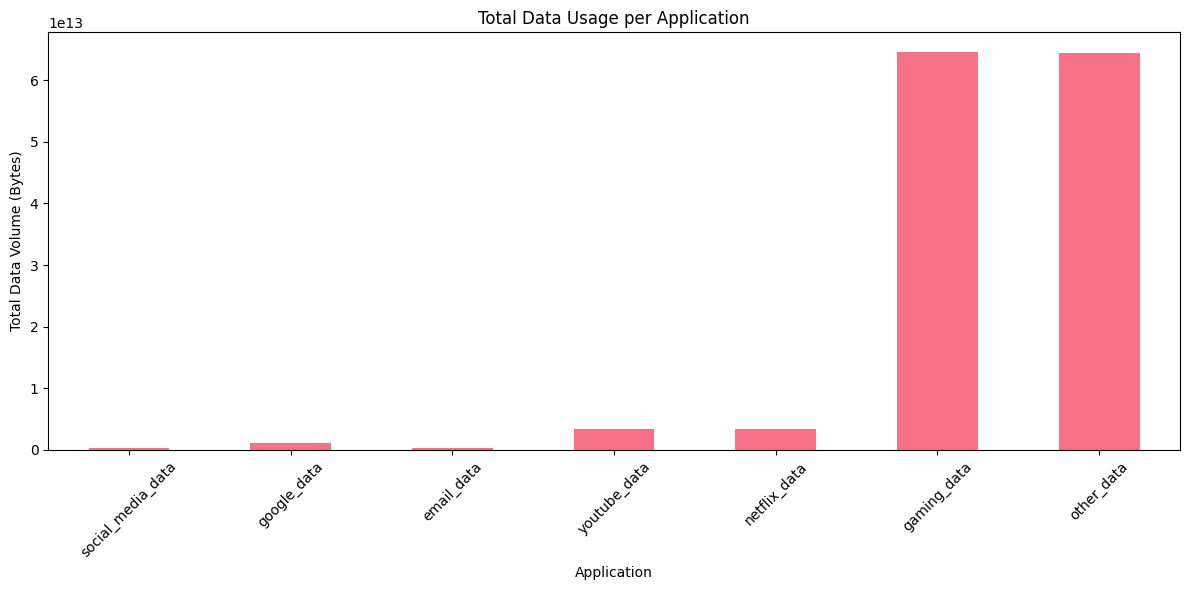

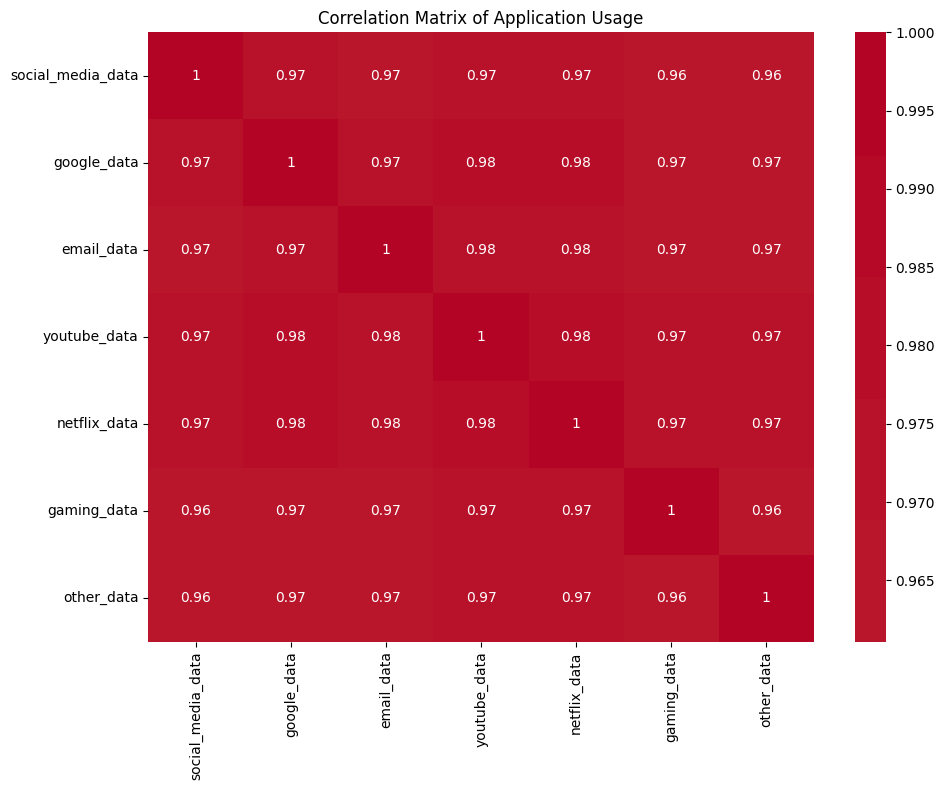

In [6]:
# Calculate total data per application
app_columns = ['social_media_data', 'google_data', 'email_data', 'youtube_data', 'netflix_data', 'gaming_data', 'other_data']
app_totals = user_behavior[app_columns].sum()

# Visualize application usage
plt.figure(figsize=(12, 6))
app_totals.plot(kind='bar')
plt.title('Total Data Usage per Application')
plt.xlabel('Application')
plt.ylabel('Total Data Volume (Bytes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation analysis
correlation_matrix = user_behavior[app_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Application Usage')
plt.tight_layout()
plt.show()

## 6. PCA Analysis

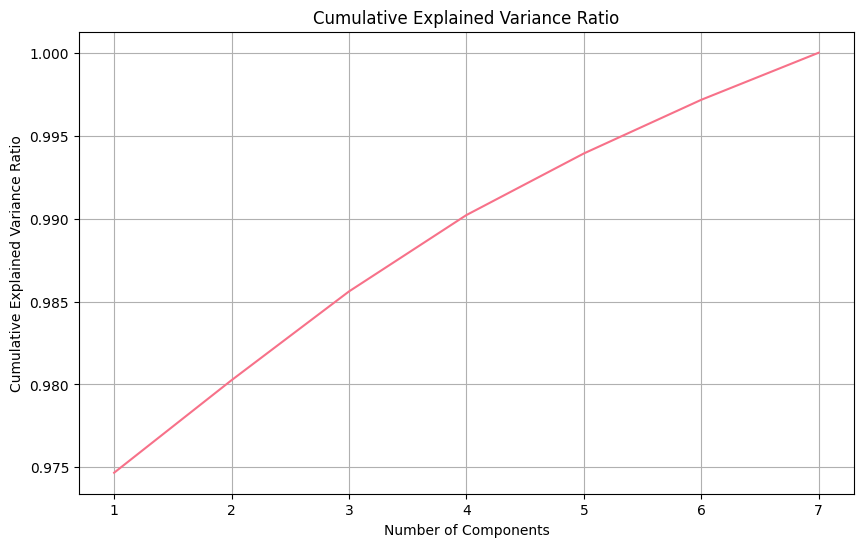

Component loadings:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
social_media_data,0.376915,-0.180450,0.751110,-0.499881,0.065794,0.083645,-0.000494
google_data,0.378642,-0.026948,0.014588,0.330328,-0.638705,0.580978,-0.033085
email_data,0.378277,-0.025188,0.051057,0.509884,0.725663,0.259018,0.002515
youtube_data,0.379304,-0.014366,0.012794,0.203681,-0.164958,-0.503762,0.730264
netflix_data,0.379261,-0.031126,0.019638,0.213230,-0.144761,-0.568342,-0.682181
gaming_data,0.376764,-0.540877,-0.613638,-0.416880,0.091540,0.082327,-0.001840
other_data,0.376578,0.819972,-0.236460,-0.346813,0.067776,0.069362,-0.015434


In [7]:
# Perform PCA on application usage data
pca, pca_result = perform_pca(user_behavior, app_columns)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Display component loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(app_columns))], 
                       index=app_columns)
print("Component loadings:")
display(loadings)